# Задачи


- Задача 1. Отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение? Насколько обучение сокращает время прохождения этапов?

- Задача 2. Существует ли зависимость между вероятностью оплаты тренировки и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение влияет на оплату само по себе, без разницы, какое оно было по порядку

- Дополнительная задача. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности тренировок? Это позволит нам понять, насколько процесс работы с приложением понятен для пользователей: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.



In [1]:
# Загружаем необходимые в работе библиотеки
import pandas as pd
import psycopg2
import psycopg2.extras 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Первым делом получаем данные из базы, по событиям (Events) и оплатам (Purchase) пользователей, которые зарегистрировались в **2018 году**.

In [2]:
def getEventsData():
    query = '''SELECT e.* FROM case8.events e
    WHERE e.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

def getPurchaseData():
    query = '''SELECT p.* FROM case8.purchase p
    WHERE p.user_id in
    (SELECT DISTINCT(user_id) 
    FROM case8.events 
    WHERE event_type = 'registration' 
    AND start_time >= '2018-01-01'
    AND start_time < '2019-01-01')
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

events_df = pd.DataFrame(getEventsData())
purchase_df = pd.DataFrame(getPurchaseData())


In [3]:
events_df.info() #получаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82779 entries, 0 to 82778
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      82779 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      82779 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         82779 non-null  int64         
 5   id              82779 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.8+ MB


*Итак, мы видим, что датафрейм **events_df** содержит 82779 строк и 6 столбцов. При этом все строки содержат значения в столбцах **id**, **user_id**, **start_time**, **event_type**, а остальные столбцы содержат пропущенные значения.*


In [4]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1974 non-null   int64         
 1   start_time  1974 non-null   datetime64[ns]
 2   amount      1974 non-null   int64         
 3   id          1974 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 61.8 KB


*Датафрейм **purchase_df** содержит 1974 строки и 4 столбца. При этом все строки содержат значения в столбцах.*

Произведем преобразование типов и  Объединяем датафреймы

In [5]:
purchase_df['event_type'] = 'purchase'

In [6]:
events_df['start_time'] = pd.to_datetime(events_df['start_time'])
purchase_df['start_time'] = pd.to_datetime(purchase_df['start_time'])

In [7]:
events_df = events_df.rename(columns={'id':'event_id'})
purchase_df = purchase_df.rename(columns={'id':'purchase_id'})

In [8]:
total_events_df = pd.concat([events_df,purchase_df],sort=False)

In [9]:
total_events_df = total_events_df.reset_index(drop=True).sort_values('start_time')

In [10]:
total_events_df.head(10)

,event_type,selected_level,start_time,tutorial_id,user_id,event_id,amount,purchase_id
0,registration,None,2018-01-01 04:51:58,NaN,47758,147264.0,NaN,NaN
1,registration,None,2018-01-01 08:32:05,NaN,47759,147268.0,NaN,NaN
2,registration,None,2018-01-01 09:30:10,NaN,47760,147269.0,NaN,NaN
3,registration,None,2018-01-01 09:39:27,NaN,47761,147270.0,NaN,NaN
4,registration,None,2018-01-01 11:41:27,NaN,47762,147271.0,NaN,NaN
5,registration,None,2018-01-01 12:23:51,NaN,47763,147272.0,NaN,NaN
6,tutorial_start,None,2018-01-01 13:55:11,49555.0,47758,147273.0,NaN,NaN
7,tutorial_start,None,2018-01-01 13:56:40,49556.0,47761,147274.0,NaN,NaN
8,tutorial_finish,None,2018-01-01 13:59:44,49556.0,47761,147275.0,NaN,NaN
9,registration,None,2018-01-01 14:15:39,NaN,47764,147276.0,NaN,NaN


In [11]:
total_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84753 entries, 0 to 82821
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_type      84753 non-null  object        
 1   selected_level  10198 non-null  object        
 2   start_time      84753 non-null  datetime64[ns]
 3   tutorial_id     41201 non-null  float64       
 4   user_id         84753 non-null  int64         
 5   event_id        82779 non-null  float64       
 6   amount          1974 non-null   float64       
 7   purchase_id     1974 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 5.8+ MB


Далее определим общее количество зарегестрированных человек в приложении.

In [12]:
all_users = total_events_df['user_id'].unique()
print (len(all_users))

24460


Выявим количество пользователей, которые перешли к выполнению обучения и завершили его.

In [13]:
users_with_finished_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'].unique()
print(len(users_with_finished_tutorial))

12531


Определим количество пользователей, которые не проходили обучение.

In [14]:
users_with_started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'].unique()
set_users_with_started_tutorial = set(users_with_started_tutorial)
set_all_users = set(all_users)
set_users_not_started_tutorial = set_all_users.difference(set_users_with_started_tutorial)
print (len(set_users_not_started_tutorial))
print (len(set_all_users)-len(set_users_with_started_tutorial) == len(set_users_not_started_tutorial))

9909
True


**Нахождение времени между этапами**

*Первым делом выделим отдельный датафрейм **registration_df**, который будет содержать только события с event_type = registration. Этот датафрейм будет вспомогательным для определения времени между регистрацией и выбором уровня сложности*

In [15]:
registration_df = total_events_df[total_events_df['event_type'] == 'registration'] 
registration_df['user_id'].value_counts().mean()

1.0

In [16]:
#оставим в датафрейме registration_df только те данные, которые нужны для наших вычислений — столбец user_id с идентификатором пользователя и столбец start_time со временем регистрации. Также переименуем столбец start_time в столбец registration_time для понятности
registration_df = registration_df[['user_id','start_time']].rename(columns={'start_time':'registration_time'})

In [17]:
registration_df.head()

,user_id,registration_time
0,47758,2018-01-01 04:51:58
1,47759,2018-01-01 08:32:05
2,47760,2018-01-01 09:30:10
3,47761,2018-01-01 09:39:27
4,47762,2018-01-01 11:41:27


**Затрачиваемое время от начала регистрации пользователей до выбора уровня сложности тренировок.**

In [18]:
users_with_finished_tutorial_df = total_events_df[total_events_df['user_id'].isin(users_with_finished_tutorial)]
users_with_finished_tutorial_df_level_choice = users_with_finished_tutorial_df[users_with_finished_tutorial_df['event_type'] == 'level_choice']
print(users_with_finished_tutorial_df_level_choice['user_id'].value_counts().mean())
users_with_finished_tutorial_df_level_choice = users_with_finished_tutorial_df_level_choice[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'})
merged_df_1 = registration_df.merge(users_with_finished_tutorial_df_level_choice,on='user_id',how='inner')
merged_df_1['timedelta'] = merged_df_1['level_choice_time'] - merged_df_1['registration_time']
print(merged_df_1['timedelta'].mean())
print(merged_df_1['timedelta'].describe())

1.0
0 days 07:05:08.490144
count                      9132
mean     0 days 07:05:08.490144
std      0 days 04:31:41.194325
min             0 days 00:06:07
25%      0 days 03:47:53.500000
50%      0 days 06:01:46.500000
75%      0 days 09:18:06.500000
max             1 days 13:26:15
Name: timedelta, dtype: object


Между регистрацией и выбором уровня сложности у пользователей, которые **прошли** обучение в среднем проходит 7 часов 5 минут.
- количество пользователей: 9132
- четверть пользователей тратит меньше 3 часов 47 минут;
- половина всех пользователей тратит менее 6 часов и 1 минуты.


In [19]:
users_not_started_tutorial_df = total_events_df[total_events_df['user_id'].isin(set_users_not_started_tutorial)]
users_not_started_tutorial_df_level_choice = users_not_started_tutorial_df[users_not_started_tutorial_df['event_type'] == 'level_choice']
print(users_not_started_tutorial_df_level_choice['user_id'].value_counts().mean())
users_not_started_tutorial_df_level_choice = users_not_started_tutorial_df_level_choice[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'})
merged_df_4 = registration_df.merge(users_not_started_tutorial_df_level_choice,on='user_id',how='inner')
merged_df_4['timedelta'] = merged_df_4['level_choice_time'] - merged_df_4['registration_time']
print(merged_df_4['timedelta'].mean())
print(merged_df_4['timedelta'].describe())

1.0
0 days 05:10:36.233644
count                       107
mean     0 days 05:10:36.233644
std      0 days 03:25:55.053229
min             0 days 00:05:08
25%             0 days 02:28:16
50%             0 days 04:58:09
75%             0 days 06:56:55
max             0 days 15:06:24
Name: timedelta, dtype: object


Между регистрацией и выбором уровня сложности у пользователей, которые **не проходили** обучение в среднем проходит 5 часов 10 минут.
- количество пользователей: 107
- четверть пользователей тратит меньше 2 часов 28 минут;
- половина всех пользователей тратит менее 4 часов 58 минут.

*Итак, в среднем пользователи, которые **не проходили** обучение тратят почти на 2 часа меньше, между регистрацией в приложении и выбором уровня сложности. Что логично обуславливается отсутствием затрат времени на прохождение обучения.*

**Затрачиваемое пользователями время от выбора уровня сложности тренировок до выбора бесплатного набора тренировок.**

In [20]:
users_with_finished_tutorial_df = total_events_df[total_events_df['user_id'].isin(users_with_finished_tutorial)]
users_with_finished_tutorial_df_training_choice = users_with_finished_tutorial_df[users_with_finished_tutorial_df['event_type'] == 'training_choice']
print(users_with_finished_tutorial_df_training_choice['user_id'].value_counts().mean())
users_with_finished_tutorial_df_training_choice = users_with_finished_tutorial_df_training_choice[['user_id','start_time']].rename(columns={'start_time':'training_choice_time'})
merged_df_2 = users_with_finished_tutorial_df_level_choice.merge(users_with_finished_tutorial_df_training_choice,on='user_id',how='inner')
merged_df_2['timedelta'] = merged_df_2['training_choice_time'] - merged_df_2['level_choice_time']
print(merged_df_2['timedelta'].mean())
print(merged_df_2['timedelta'].describe())

1.0
0 days 00:05:09.668813
count                      6211
mean     0 days 00:05:09.668813
std      0 days 00:02:43.241217
min             0 days 00:00:15
25%             0 days 00:02:56
50%             0 days 00:04:47
75%             0 days 00:07:01
max             0 days 00:15:35
Name: timedelta, dtype: object


Между выбором уровня сложности и выбора бесплатного набора тренировок у пользователей, которые **прошли** обучение в среднем проходит 5 минут и 10 секунд.

In [21]:
users_not_started_tutorial_df = total_events_df[total_events_df['user_id'].isin(set_users_not_started_tutorial)]
users_not_started_tutorial_df_training_choice = users_not_started_tutorial_df[users_not_started_tutorial_df['event_type'] == 'training_choice']
print(users_not_started_tutorial_df_training_choice['user_id'].value_counts().mean())
users_not_started_tutorial_df_training_choice = users_not_started_tutorial_df_training_choice[['user_id','start_time']].rename(columns={'start_time':'training_choice_time'})
merged_df_5 = users_not_started_tutorial_df_level_choice.merge(users_not_started_tutorial_df_training_choice,on='user_id',how='inner')
merged_df_5['timedelta'] = merged_df_5['training_choice_time'] - merged_df_5['level_choice_time']
print(merged_df_5['timedelta'].mean())
print(merged_df_5['timedelta'].describe())

1.0
0 days 00:05:31.077922
count                        77
mean     0 days 00:05:31.077922
std      0 days 00:02:46.163027
min             0 days 00:00:11
25%             0 days 00:03:21
50%             0 days 00:05:13
75%             0 days 00:07:28
max             0 days 00:11:49
Name: timedelta, dtype: object


Между выбором уровня сложности и выбора бесплатного набора тренировок у пользователей, которые **не проходили** обучение в среднем проходит 5 с половиной минут.

**Затрачиваемое пользователями время от выбора бесплатного набора тренировок до покупки платных тренировок.**

In [22]:
users_with_finished_tutorial_df = total_events_df[total_events_df['user_id'].isin(users_with_finished_tutorial)]
users_with_finished_tutorial_df_purchase = users_with_finished_tutorial_df[users_with_finished_tutorial_df['event_type'] == 'purchase']
print(users_with_finished_tutorial_df_purchase['user_id'].value_counts().mean())
users_with_finished_tutorial_df_purchase = users_with_finished_tutorial_df_purchase[['user_id','start_time']].rename(columns={'start_time':'purchase_time'})
merged_df_3 = users_with_finished_tutorial_df_training_choice.merge(users_with_finished_tutorial_df_purchase,on='user_id',how='inner')
merged_df_3['timedelta'] = merged_df_3['purchase_time'] - merged_df_3['training_choice_time']
print(merged_df_3['timedelta'].mean())
print(merged_df_3['timedelta'].describe())

1.0
3 days 16:59:07.005614
count                      1781
mean     3 days 16:59:07.005614
std      2 days 03:37:52.042729
min             0 days 01:31:41
25%             1 days 22:51:29
50%             3 days 12:22:50
75%             5 days 06:56:21
max            10 days 07:56:10
Name: timedelta, dtype: object


Между выбором бесплатного набора тренировок и покупки платных тренировок у пользователей, которые **прошли** обучение в среднем проходит 3 дня 16 часов 59 минут.
- количество пользователей: 1781
- четверть пользователей тратит меньше 1 дня 22 часов и 51 минуты;
- половина всех пользователей тратит менее 3 дней 12 часов и 22 минут.

In [23]:
users_not_started_tutorial_df = total_events_df[total_events_df['user_id'].isin(set_users_not_started_tutorial)]
users_not_started_tutorial_df_purchase = users_not_started_tutorial_df[users_not_started_tutorial_df['event_type'] == 'purchase']
print(users_not_started_tutorial_df_purchase['user_id'].value_counts().mean())
users_not_started_tutorial_df_purchase = users_not_started_tutorial_df_purchase[['user_id','start_time']].rename(columns={'start_time':'purchase_time'})
merged_df_6 = users_not_started_tutorial_df_training_choice.merge(users_not_started_tutorial_df_purchase,on='user_id',how='inner')
merged_df_6['timedelta'] = merged_df_6['purchase_time'] - merged_df_6['training_choice_time']
print(merged_df_6['timedelta'].mean())
print(merged_df_6['timedelta'].describe())

1.0
3 days 23:07:16.111111
count                        18
mean     3 days 23:07:16.111111
std      1 days 22:59:05.990710
min             1 days 00:16:58
25%             2 days 08:16:01
50%      3 days 17:44:32.500000
75%      5 days 07:25:03.750000
max             8 days 08:24:25
Name: timedelta, dtype: object


Между выбором бесплатного набора тренировок и покупки платных тренировок у пользователей, которые **не проходили** обучение в среднем проходит 3 дня 23 часа 7 минут.
- количество пользователей: 18
- четверть пользователей тратит меньше 2 дней 8 часов и 16 минут;
- половина всех пользователей тратит менее 3 дней 17 часов и 44 минут.

*В итоге, пользователи, которые прошли обучение, от момента выбора бесплатных тренировок до покупки платных в среднем затрачивают на 6 часов 48 минут меньше тех пользователей, которые обучение не проходили. Из чего можно сделать вывод о небольшом, но присутствующем влиянии обучения на скорость прохождения бесплатных тренировок. Скорее всего, это связанно с тем, что те пользователи, которые пренебрегли прохождением обучения по использованию приложения, затрачивают время на самостоятельный разбор. Так же важно учитывать маленькую выборку пользователей, которые **не проходили** обучение и приобрели платные тренировки. Будь выборка больше, влияние обучения на затрачивание времени можно было бы проследить более точно.*

Для наглядности разности между группами воспроизведем все найденные средние временные величины в столбчатой диаграмме

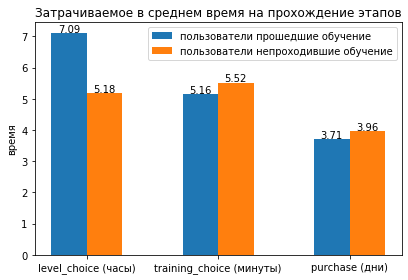

In [24]:
labels = ['level_choice (часы)', 'training_choice (минуты)', 'purchase (дни)']
# Перевели timedelta в тип float по часам, минутам и дням в зависимости от велечины времени
users_with_finished_tutorial_list = [7.09, 5.16, 3.71]
users_not_started_tutorial_list = [5.18, 5.52, 3.96]

x = np.arange(len(labels)) 
width = 0.27

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, users_with_finished_tutorial_list, width, label='пользователи прошедшие обучение')
rects2 = ax.bar(x + width/2, users_not_started_tutorial_list, width, label='пользователи непроходившие обучение')
ax.set_ylabel('время')
ax.set_title('Затрачиваемое в среднем время на прохождение этапов')
ax.set_xticks(x)   
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1), 
                    textcoords="offset points",
                    ha='center', va='baseline')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

**Взаимосвязь между прохождением обучения по работе с приложением и оплатой**

In [25]:
#Создадим датафрейм с необходимыми нам параметрами:
tut_attemps_df = total_events_df.groupby('user_id')['tutorial_id'].nunique().reset_index()
tut_attemps_df.columns = ['user_id', 'tutorial_attemps']
#Создадим колонку finish_tutorial со значением 1 если окончил обучеие, 0 - если не окончил:
tut_attemps_df['finish_tutorial'] = tut_attemps_df.apply(lambda x: 1 if x['user_id'] in users_with_finished_tutorial \
                                                                                            else 0, axis=1)
#Создадим колонку purchase со значением 1 если купил платные тренировки, 0 - если покупки не было:
set_purchase_users = set(purchase_df['user_id'])
tut_attemps_df['purchase'] = tut_attemps_df.apply(lambda x: 1 if x['user_id'] in set_purchase_users \
                                                                             else 0, axis=1)

In [26]:
tut_attemps_df.head (10) 

,user_id,tutorial_attemps,finish_tutorial,purchase
0,47758,2,0,0
1,47759,2,1,0
2,47760,2,1,0
3,47761,3,1,0
4,47762,1,0,0
5,47763,1,0,0
6,47764,1,0,0
7,47765,2,0,0
8,47766,2,1,0
9,47767,1,0,0


In [27]:
users_purchase = tut_attemps_df[tut_attemps_df['user_id'].isin(users_with_started_tutorial)]
users_purchase_1 = users_purchase[users_purchase['purchase'] > 0]
print ('Количество пользователей купивших платные тренировки из начинавших обучение по работе с приложением:', (sum(users_purchase_1['purchase'])))
print ('Общее количество обучений пользователей купивших платные тренировки:',(sum(users_purchase_1['tutorial_attemps'])))
conversion_rate = sum(users_purchase_1['finish_tutorial'])/sum(users_purchase_1['purchase'])
print('Процент пользователей оплативших тренировку, которые завершали обучение один раз или более: {:.2%}'.format(conversion_rate))

Количество пользователей купивших платные тренировки из начинавших обучение по работе с приложением: 1956
Общее количество обучений пользователей купивших платные тренировки: 5074
Процент пользователей оплативших тренировку, которые завершали обучение один раз или более: 91.05%


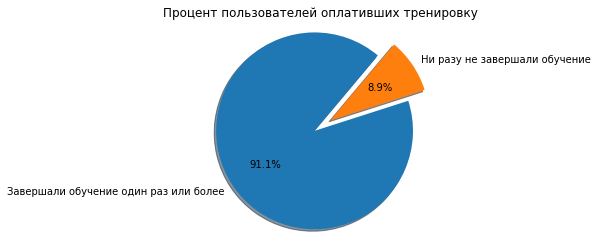

In [28]:
labels1 = 'Завершали обучение один раз или более', 'Ни разу не завершали обучение'
sizes = [91.05, 8.95]
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=50)
ax1.axis('equal') 
ax1.set_title('Процент пользователей оплативших тренировку')
plt.show()

Рассмотрим более подробно каждую группу пользователей оплативших тренировки

In [29]:
purchase_df_1 = purchase_df[purchase_df['user_id'].isin(users_with_finished_tutorial)]
print ('Количество пользователей, завершивших обучение:',(purchase_df_1['user_id'].nunique()))
percent_of_purchase_1 = purchase_df_1['user_id'].nunique()/len(users_with_finished_tutorial)
print ('Процент таких пользователей, перешедших в покупателей: {:.2%}'.format(percent_of_purchase_1))
print ('Средний чек:',(purchase_df_1['amount'].mean()))

Количество пользователей, завершивших обучение: 1781
Процент таких пользователей, перешедших в покупателей: 14.21%
Средний чек: 108.07130825379001


In [30]:
users_with_started_tutorial = total_events_df[total_events_df['event_type'] == 'tutorial_start']['user_id'].unique()
set_users_with_started_tutorial = set(users_with_started_tutorial)
set_users_not_finished_but_started_tutorial = set_users_with_started_tutorial.difference(set(users_with_finished_tutorial))
purchase_df_2 = purchase_df[purchase_df['user_id'].isin(set_users_not_finished_but_started_tutorial)]
print ('Количество пользователей, начавших обучение, но не завершивших:',(purchase_df_2['user_id'].nunique()))
percent_of_purchase_2 = purchase_df_2['user_id'].nunique()/len(set_users_not_finished_but_started_tutorial)
print ('Процент таких пользователей, перешедших в покупателей: {:.2%}'.format(percent_of_purchase_2))
print ('Средний чек:',(purchase_df_2['amount'].mean()))


Количество пользователей, начавших обучение, но не завершивших: 175
Процент таких пользователей, перешедших в покупателей: 8.66%
Средний чек: 105.42857142857143


In [31]:
purchase_df_3 = purchase_df[purchase_df['user_id'].isin(set_users_not_started_tutorial)]
print ('Количество пользователей, которые ни разу не начинали обучение:',(purchase_df_3['user_id'].nunique()))
percent_of_purchase_3 = purchase_df_3['user_id'].nunique()/len(set_users_not_started_tutorial)
print ('Процент таких пользователей, перешедших в покупателей: {:.2%}'.format(percent_of_purchase_3))
print ('Средний чек:',(purchase_df_3['amount'].mean()))

Количество пользователей, которые ни разу не начинали обучение: 18
Процент таких пользователей, перешедших в покупателей: 0.18%
Средний чек: 104.16666666666667


*В итоге, найденная конверсия показывает прямую зависимость от завершения обучения по работе с приложением и покупки платной тренировки. Как мы видим, прохождение обучения прямо коррелирует с дальнейшей возможностью пользователя стать покупателем платных тренировок. Скорее всего, те пользователи, которые не прошли обучение до конца (либо совсем не обучались работе с приложением) упускали какие-то возможности приложения при его использовании. Следует обязательно рассмотреть способы привлекательности прохождения обучения, например, ввести скидку на покупку платных тренировок или предоставить какое-то количество бесплатно при прохождении обучения. Либо  сделать прохождение обучения обязательным хотя бы 1 раз.*

**Нахождение частоты возврата пользователей к обучению после того, как они выбрали уровень сложности тренировок**


In [32]:
tutorial_start_df = total_events_df[total_events_df['event_type'] == 'tutorial_start'] 
tutorial_start_df = tutorial_start_df[['user_id','start_time']].rename(columns={'start_time':'tutorial_start_time'})
merged_df_7 = tutorial_start_df.merge(users_with_finished_tutorial_df_level_choice,on='user_id',how='inner')
merged_df_7['timedelta'] = merged_df_7['level_choice_time'] - merged_df_7['tutorial_start_time']
merged_df_7['timedelta'] = merged_df_7['timedelta'].apply (lambda x: x / np.timedelta64 (1, 'D'))
users_return_start_tutorial = merged_df_7[merged_df_7['timedelta'] < 0] 
percent_users_return_start_tutorial = len(users_return_start_tutorial['user_id'])/len(merged_df_7['user_id'])
print ('Процент возврата к обучению: {:.2%}'.format(percent_users_return_start_tutorial))

Процент возврата к обучению: 24.36%


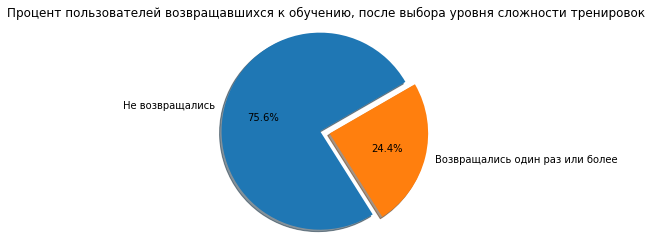

In [33]:
labels1 = 'Не возвращались','Возвращались один раз или более'
sizes = [75.64, 24.36]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal') 
ax1.set_title('Процент пользователей возвращавшихся к обучению, после выбора уровня сложности тренировок')
plt.show()

*Почти четверть пользователей возвращается к обучению, после выбора уровня сложности тренировок. В целом это свидетельствует о понятности работы с приложением для большинства пользователей. Тем не менее, следует уделить внимание на возможности улучшения обучающего этапа, либо улучшение интуитивной понятности при использовании приложения.*